<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Spain" data-toc-modified-id="Spain-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Spain</a></span></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Fit-and-Predict" data-toc-modified-id="Fit-and-Predict-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Fit and Predict</a></span></li><li><span><a href="#Display-Actual-vs-Prediction" data-toc-modified-id="Display-Actual-vs-Prediction-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Display Actual vs Prediction</a></span></li><li><span><a href="#Commentary" data-toc-modified-id="Commentary-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Commentary</a></span><ul class="toc-item"><li><span><a href="#25th-April" data-toc-modified-id="25th-April-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>25th April</a></span></li><li><span><a href="#16th-April" data-toc-modified-id="16th-April-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>16th April</a></span></li><li><span><a href="#7th-April" data-toc-modified-id="7th-April-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>7th April</a></span></li><li><span><a href="#4th-April" data-toc-modified-id="4th-April-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>4th April</a></span></li><li><span><a href="#30th-March" data-toc-modified-id="30th-March-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>30th March</a></span></li></ul></li></ul></div>

## Spain
Spain had a brutal experience - the spread, especially measured per-capita, was quicker and larger than any country in Europe.

## Load data

In [1]:
import sys
from os import path
sys.path.append(path.pardir)
from src.covid import CovidCountry
import pandas as pd

# Get our Country model data
country = 'Spain'
filepath = '../data/raw/'

# Load and fix Italy data
fix_data  = {'2020-03-24': 42058,
             #'2020-04-14': 174060,
             #'2020-04-15': 180659,
             #'2020-04-16': 184948,
             #'2020-04-17': 190839,
             #'2020-04-18': 194416,
             #'2020-04-19': 198674,
             #'2020-04-20': 200210,
            }

es = CovidCountry(country=country,
                  filepath=filepath,
                  fixes=fix_data)

es.load()

## Fit and Predict

In [2]:
es.fit(curve='gamma')
es_df = es.predict()
es.save(filepath='../data/processed/')

In [3]:
# Show small window of prediction and actual
es_df[pd.Timestamp.now().date()-pd.Timedelta('3D'):].diff()[1:6]

,Actual,Prediction
Date,,
2020-06-22,232.0,NaN
2020-06-23,248.0,NaN


## Display Actual vs Prediction

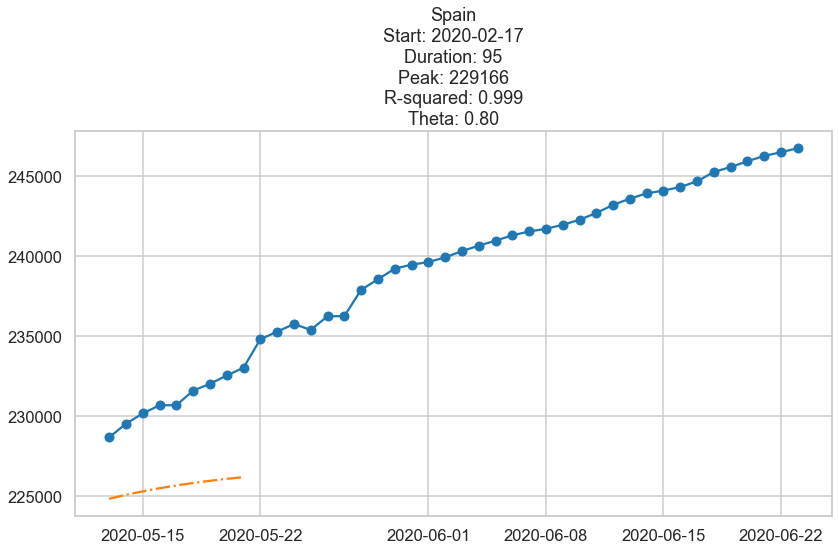

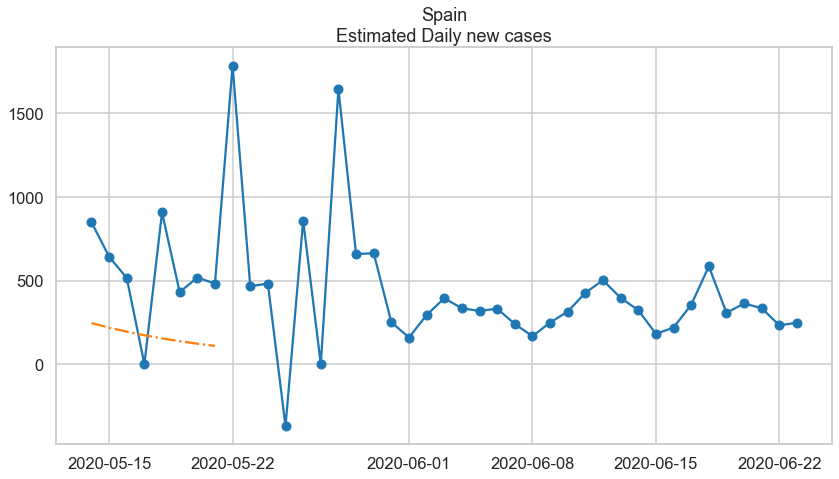

In [4]:
es.display(offset=42)

## Commentary
### 1st May
Weird - it now shows -10k (minus) on 24th April. But I can't find commentary to explain. Setting province to true makes no difference - the reduction is present for mainland Spain.

### 25th April
I really need to find some commentary behind the figures - they are much higher, why?

### 16th April
I can't see any commentary behind yesterday's figure - it is well above the variation that normally occurs: When this happened in the UK, this was because they added a new cohort of cases. 

### 7th April
Spain fits a very short duration. That was no doubt brutal.


### 4th April
The shorter duration is still fitting quite well. I'm pretty sure Spain has passed the peak. At the same point in time with Italy, I found the duration still increased, but it only moved the peak day 3 days later. Even if that is the case, Spain is almost 3 weeks shorter in duration than Italy. It will be interesting in the analysis that follows to understand why.

### 30th March
Spain appears to have the worst out break in Europe, especially when you adjust cases per capita. I need to find their testing per capita to see if they are closer to Germany, who test the most, or the UK, who (until 29th March) just tested hospital admissions with COVID symptoms.

As of 30th March, its possible the Spain curve is starting to dip - I can't tell if this will then rest on a longer, shallower curve: I have seen that pattern on other countries. Or they might have a quicker spread than Italy, by 2 weeks, and they have passed this first peak.

I have modeled the shorter duration for now - the next 4 days should make it clear which curve fits best.